In [28]:
import pandas as pd
from matplotlib.finance import candlestick_ochl
import matplotlib.pyplot as plt

In [2]:
stock_day = pd.read_csv("./data/stock_day/stock_day.csv")

In [4]:
stock_day = stock_day.sort_index()

In [6]:
# 对每日交易数据进行重采样 （频率转换）
stock_day.index

Index(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
       '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
       ...
       '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27'],
      dtype='object', length=643)

In [8]:
# 1、必须将时间索引类型编程Pandas默认的类型
stock_day.index = pd.to_datetime(stock_day.index)

In [9]:
stock_day.index

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12',
               '2018-02-13', '2018-02-14', '2018-02-22', '2018-02-23',
               '2018-02-26', '2018-02-27'],
              dtype='datetime64[ns]', length=643, freq=None)

In [12]:
# 2、进行频率转换日K---周K

period_week_data = stock_day.resample('W').last()

In [15]:
stock_day.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,124820.96,120066.09,120066.09,4.96
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,127775.94,117664.81,117664.81,4.10
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,126135.54,114032.98,114032.98,2.91
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10


In [16]:
# 分别对于开盘、收盘、最高价、最低价进行处理
period_week_data['open'] = stock_day['open'].resample('W').first()

In [17]:
period_week_data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,12.25,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.14,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,14.52,15.48,15.34,15.18,76800.13,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,15.34,15.86,15.77,14.90,120352.13,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,15.99,16.77,16.66,16.25,91962.88,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15
2015-04-12,16.54,19.89,19.43,19.20,112962.15,-0.19,-0.97,18.334,17.276,16.230,133648.38,109309.78,106228.29,3.87
2015-04-19,19.60,23.97,22.06,21.80,206773.17,-0.91,-3.96,22.756,20.545,18.159,200934.24,167291.31,129973.64,7.08
2015-04-26,21.70,21.82,21.50,21.00,93312.18,-0.31,-1.42,21.622,22.189,19.733,125742.68,163338.46,136324.12,3.19
2015-05-03,22.56,22.80,22.49,22.20,91975.28,0.40,1.81,22.150,21.942,20.963,106379.26,127407.07,140327.35,3.15
2015-05-10,22.20,20.18,20.00,19.10,89248.75,1.19,6.33,20.250,21.200,21.591,78174.86,92277.06,128790.26,3.05


In [18]:
# 处理最高价和最低价
period_week_data['high'] = stock_day['high'].resample('W').max()

In [19]:
period_week_data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,12.25,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.14,15.08,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,14.52,15.66,15.34,15.18,76800.13,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,15.34,16.16,15.77,14.90,120352.13,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,15.99,16.88,16.66,16.25,91962.88,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15
2015-04-12,16.54,19.89,19.43,19.20,112962.15,-0.19,-0.97,18.334,17.276,16.230,133648.38,109309.78,106228.29,3.87
2015-04-19,19.60,25.56,22.06,21.80,206773.17,-0.91,-3.96,22.756,20.545,18.159,200934.24,167291.31,129973.64,7.08
2015-04-26,21.70,22.78,21.50,21.00,93312.18,-0.31,-1.42,21.622,22.189,19.733,125742.68,163338.46,136324.12,3.19
2015-05-03,22.56,23.65,22.49,22.20,91975.28,0.40,1.81,22.150,21.942,20.963,106379.26,127407.07,140327.35,3.15
2015-05-10,22.20,22.55,20.00,19.10,89248.75,1.19,6.33,20.250,21.200,21.591,78174.86,92277.06,128790.26,3.05


In [21]:
# 3、最低价
period_week_data['low'] = stock_day['low'].resample('W').min()

In [23]:
# 4、成交量  这一周的每天成交量的和
period_week_data['volume'] = stock_day['volume'].resample('W').sum()

In [26]:
period_week_data.dropna(axis=0)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,12.25,14.48,14.28,12.20,575450.89,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.14,15.08,14.47,13.80,512188.19,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,14.52,15.66,15.34,14.51,545222.10,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,15.34,16.16,15.77,14.90,545255.68,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,15.99,16.88,16.66,15.99,396466.69,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15
2015-04-12,16.54,19.89,19.43,16.50,576279.02,-0.19,-0.97,18.334,17.276,16.230,133648.38,109309.78,106228.29,3.87
2015-04-19,19.60,25.56,22.06,19.50,1004671.20,-0.91,-3.96,22.756,20.545,18.159,200934.24,167291.31,129973.64,7.08
2015-04-26,21.70,22.78,21.50,20.24,628713.40,-0.31,-1.42,21.622,22.189,19.733,125742.68,163338.46,136324.12,3.19
2015-05-03,22.56,23.65,22.49,21.02,438584.12,0.40,1.81,22.150,21.942,20.963,106379.26,127407.07,140327.35,3.15
2015-05-10,22.20,22.55,20.00,18.59,390874.32,1.19,6.33,20.250,21.200,21.591,78174.86,92277.06,128790.26,3.05


In [29]:
# 先画日K线
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), dpi=80)

In [34]:
# 准备数据， array数组
stock_day['index'] = [i for i in range(stock_day.shape[0])]

In [36]:
day_k = stock_day[['index', 'open', 'close', 'high', 'low']]

In [38]:
day_k.values

array([[   0.  ,   12.25,   12.52,   12.67,   12.2 ],
       [   1.  ,   12.52,   12.7 ,   13.06,   12.52],
       [   2.  ,   12.8 ,   12.9 ,   12.92,   12.61],
       ..., 
       [ 640.  ,   22.88,   22.82,   23.37,   22.71],
       [ 641.  ,   22.8 ,   23.53,   23.78,   22.8 ],
       [ 642.  ,   23.53,   24.16,   25.88,   23.53]])

In [39]:
candlestick_ochl(axes, day_k.values, width=0.2, colorup='r', colordown='g')

([<matplotlib.lines.Line2D at 0x111963b00>,
  <matplotlib.patches.Rectangle at 0x112b919b0>])

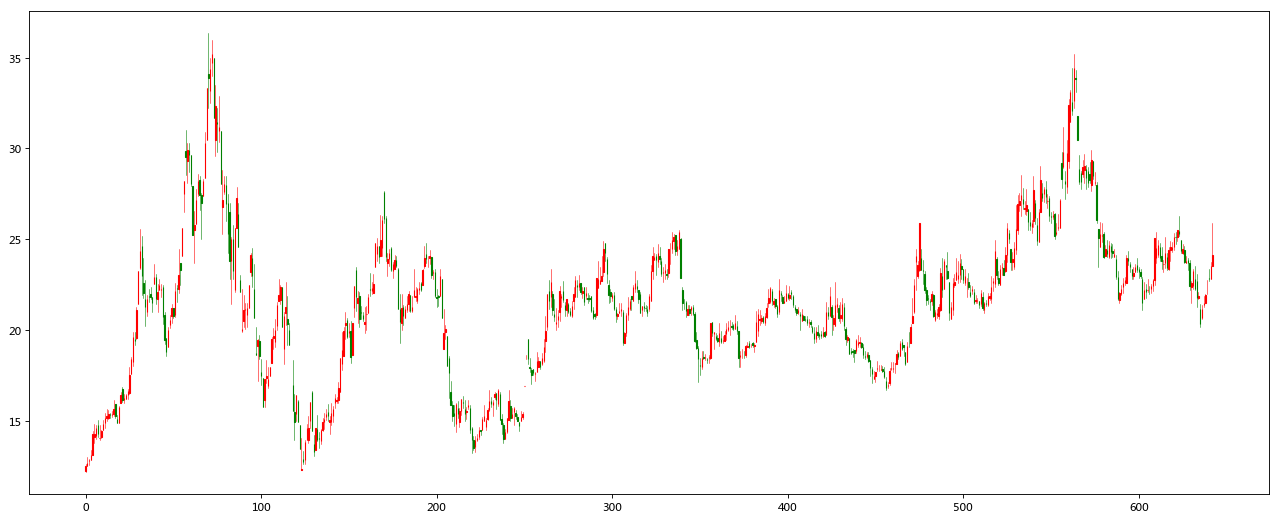

In [40]:
plt.show()

In [42]:
# 将周K线图显示出来
period_week_data['index'] = [i for i in range(period_week_data.shape[0])]

In [44]:
week_k = period_week_data[['index', 'open', 'close', 'high', 'low']]

In [46]:
week_k.values

array([[   0.  ,   12.25,   14.28,   14.48,   12.2 ],
       [   1.  ,   14.14,   14.47,   15.08,   13.8 ],
       [   2.  ,   14.52,   15.34,   15.66,   14.51],
       [   3.  ,   15.34,   15.77,   16.16,   14.9 ],
       [   4.  ,   15.99,   16.66,   16.88,   15.99],
       [   5.  ,   16.54,   19.43,   19.89,   16.5 ],
       [   6.  ,   19.6 ,   22.06,   25.56,   19.5 ],
       [   7.  ,   21.7 ,   21.5 ,   22.78,   20.24],
       [   8.  ,   22.56,   22.49,   23.65,   21.02],
       [   9.  ,   22.2 ,   20.  ,   22.55,   18.59],
       [  10.  ,   20.31,   22.28,   22.59,   20.15],
       [  11.  ,   22.28,   29.54,   30.99,   22.08],
       [  12.  ,   29.3 ,   25.8 ,   30.3 ,   23.7 ],
       [  13.  ,   25.86,   28.19,   28.59,   25.  ],
       [  14.  ,   28.4 ,   35.21,   36.35,   28.4 ],
       [  15.  ,   34.99,   28.07,   34.99,   28.07],
       [  16.  ,   26.8 ,   25.29,   28.8 ,   24.27],
       [  17.  ,   26.5 ,   23.27,   26.98,   21.44],
       [  18.  ,   22.2 ,   

In [47]:
# 先画日K线
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), dpi=80)

In [48]:
candlestick_ochl(axes, week_k.values, width=0.2, colorup='r', colordown='g')

([<matplotlib.lines.Line2D at 0x1125b6ba8>,
  <matplotlib.patches.Rectangle at 0x1139ae470>])

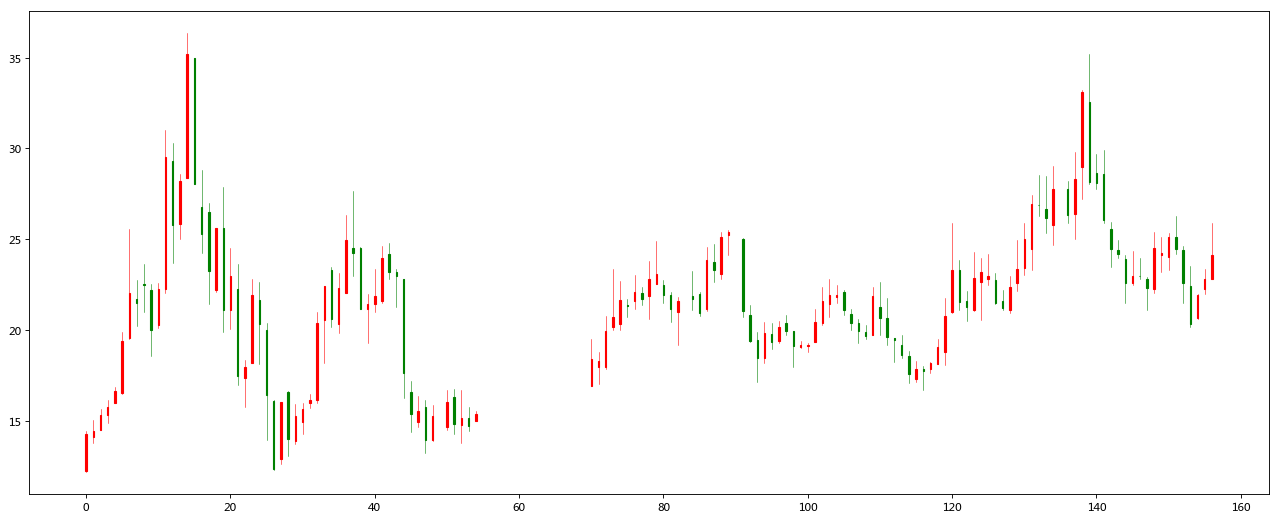

In [49]:
plt.show()